# Principal Component Analysis with Cancer Data

In [117]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import preprocessing

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [60]:
missing_values = ['?']
dfCancer = pd.read_csv("breast-cancer-wisconsin-data.csv",na_values = missing_values)
dfCancer.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [61]:
dfCancer.dtypes

ID                               int64
ClumpThickness                   int64
Cell Size                        int64
Cell Shape                       int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Normal Nucleoli                  int64
Bland Chromatin                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [62]:
dfCancer.shape

(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [63]:
# We could see "?" values in column, this should be removed from data set
# Check for missing value in any other column
dfCancer.isna().sum()

ID                              0
ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

In [65]:
# No missing values found. So let us try to remove ? from bare nuclei column
# Get count of rows having ?
dfCancer['Bare Nuclei'].isna().sum()
naList = []
naList = dfCancer['Bare Nuclei'][dfCancer['Bare Nuclei'].isnull()].index.tolist()
naList

[23, 40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315, 321, 411, 617]

In [95]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
#dfCancer['Bare Nuclei'] = dfCancer['Bare Nuclei'].astype('float')
dfCancer['Bare Nuclei'].fillna(dfCancer['Bare Nuclei'].mean(), inplace=True)
dfCancer.iloc[naList]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,3.544656,7,3,1,4
40,1096800,6,6,6,9,6,3.544656,7,8,1,2
139,1183246,1,1,1,1,1,3.544656,2,1,1,2
145,1184840,1,1,3,1,2,3.544656,2,1,1,2
158,1193683,1,1,2,1,3,3.544656,1,1,1,2
164,1197510,5,1,1,1,2,3.544656,3,1,1,2
235,1241232,3,1,4,1,2,3.544656,3,1,1,2
249,169356,3,1,1,1,2,3.544656,3,1,1,2
275,432809,3,1,3,1,2,3.544656,2,1,1,2
292,563649,8,8,8,1,2,3.544656,6,10,1,4


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [69]:
dfCancer.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [71]:
# Check for correlation of variable
corr = dfCancer.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1,-0.055,-0.042,-0.042,-0.065,-0.046,-0.099,-0.06,-0.052,-0.035,-0.08
ClumpThickness,-0.055,1,0.64,0.65,0.49,0.52,0.59,0.56,0.54,0.35,0.72
Cell Size,-0.042,0.64,1,0.91,0.71,0.75,0.69,0.76,0.72,0.46,0.82
Cell Shape,-0.042,0.65,0.91,1,0.68,0.72,0.71,0.74,0.72,0.44,0.82
Marginal Adhesion,-0.065,0.49,0.71,0.68,1,0.6,0.67,0.67,0.6,0.42,0.7
Single Epithelial Cell Size,-0.046,0.52,0.75,0.72,0.6,1,0.58,0.62,0.63,0.48,0.68
Bare Nuclei,-0.099,0.59,0.69,0.71,0.67,0.58,1,0.68,0.58,0.34,0.82
Normal Nucleoli,-0.06,0.56,0.76,0.74,0.67,0.62,0.68,1,0.67,0.34,0.76
Bland Chromatin,-0.052,0.54,0.72,0.72,0.6,0.63,0.58,0.67,1,0.43,0.71
Mitoses,-0.035,0.35,0.46,0.44,0.42,0.48,0.34,0.34,0.43,1,0.42


In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


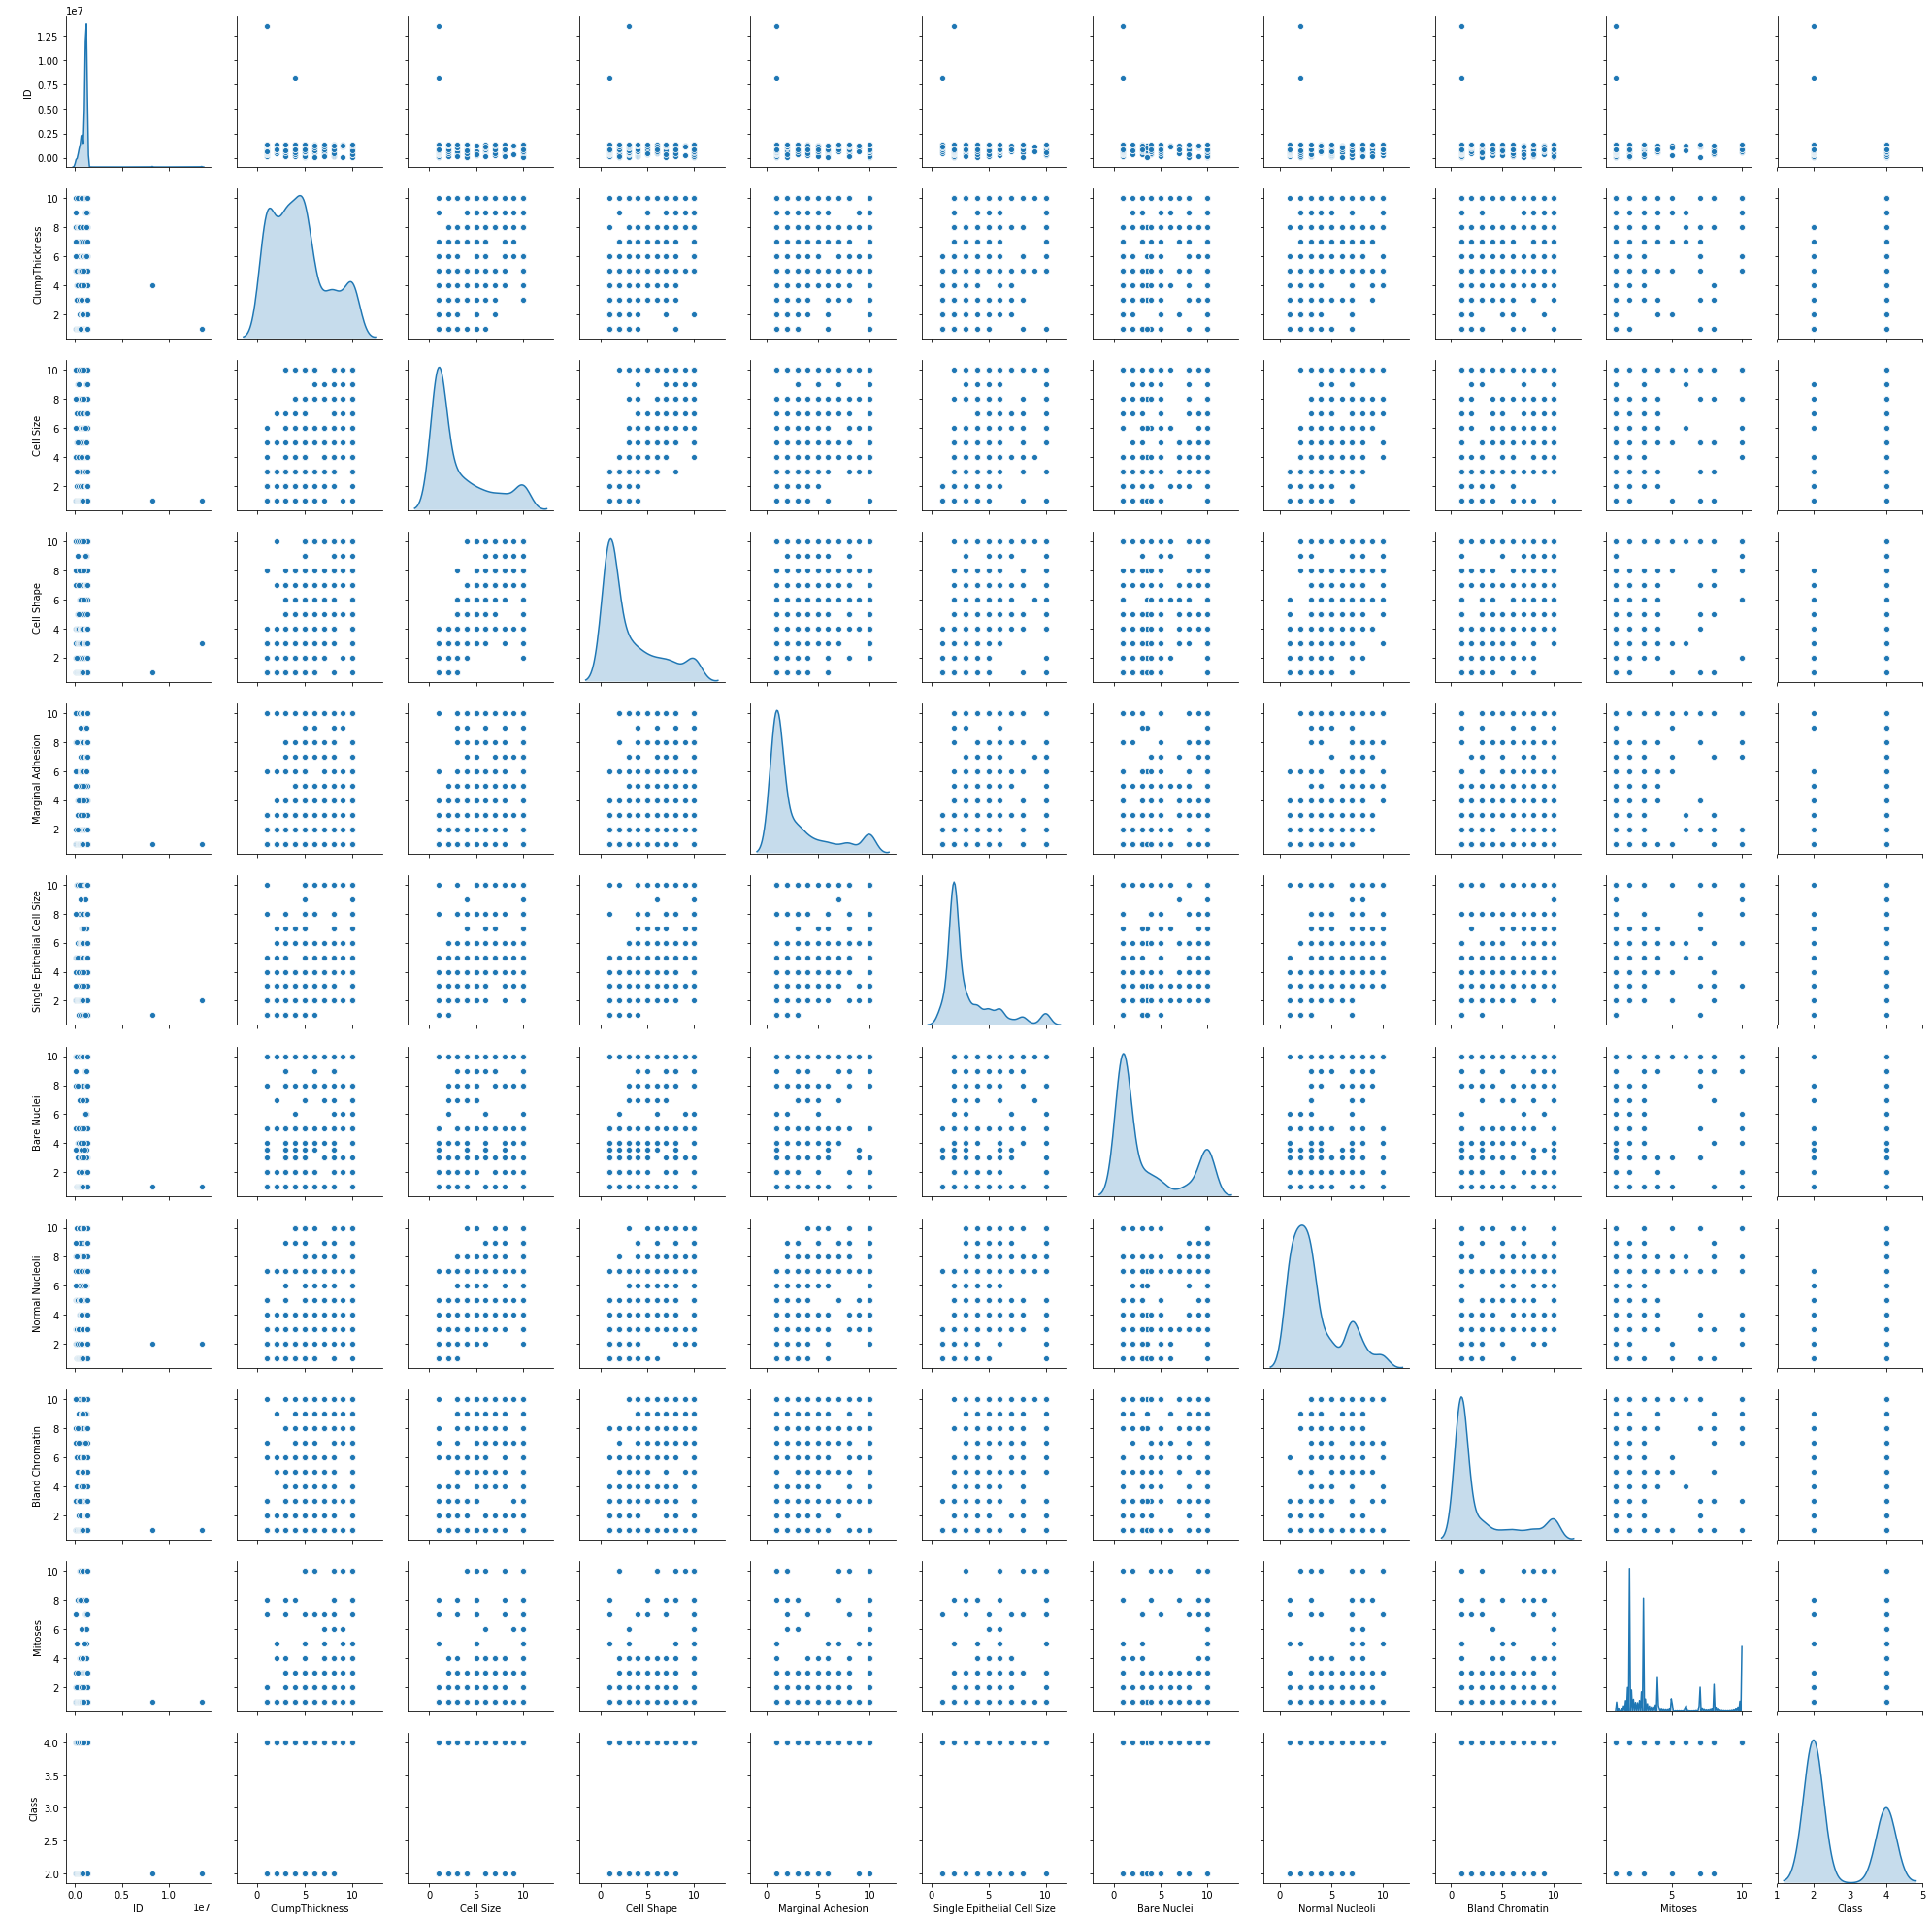

In [72]:
#Let us check for pair plots
sns.pairplot(dfCancer, diag_kind="kde")

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

#### As per the correlation matrix and Pairplot, it can be assumed that there are outliers in the data which can be removed from the dataset as well as ID & Mitoses columns doesnt hold much importance in the analysis and also the correlation is low, hence remove them from dataframe

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [74]:
# We could see most of the outliers are now removed.
# Removing Id and Mitoses columns from the dataframe due to weak correlation and holds no significance in performing analysis
dfCancer_New = dfCancer.drop(['ID','Mitoses'], axis = 1) 
dfCancer_New.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Class
0,5,1,1,1,2,1.0,3,1,2
1,5,4,4,5,7,10.0,3,2,2
2,3,1,1,1,2,2.0,3,1,2
3,6,8,8,1,3,4.0,3,7,2
4,4,1,1,3,2,1.0,3,1,2


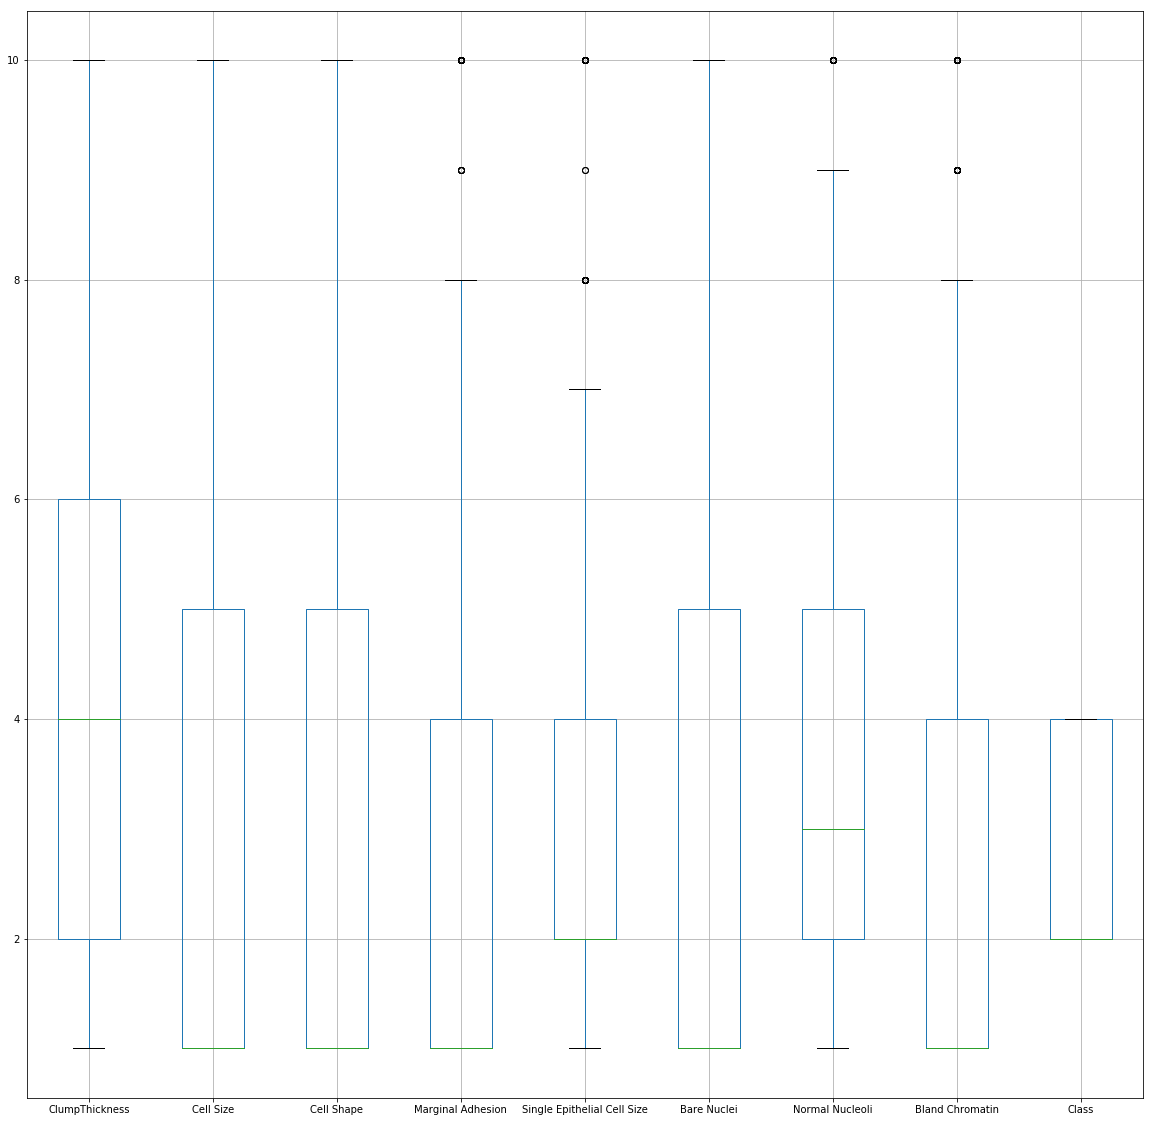

In [151]:
dfCancer_New.boxplot(return_type='axes', figsize=(20,20))

In [156]:
from scipy import stats
dfCancer_New = dfCancer_New[(np.abs(stats.zscore(dfCancer_New)) < 3).all(axis=1)]
dfCancer_New.shape

(668, 9)

In [157]:
# Standardize feature space to have mean 0 and variance 1
X_std = (dfCancer_New-np.mean(dfCancer_New,axis = 0))/np.std(dfCancer_New,axis = 0)
X_std.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Class
0,0.265868,-0.662758,-0.711994,-0.606463,-0.530259,-0.675957,-0.129455,-0.585021,-0.67949
1,0.265868,0.383867,0.356797,0.858699,2.411711,1.885218,-0.129455,-0.246084,-0.67949
2,-0.462000,-0.662758,-0.711994,-0.606463,-0.530259,-0.391382,-0.129455,-0.585021,-0.67949
3,0.629802,1.779368,1.781852,-0.606463,0.058135,0.177768,-0.129455,1.448598,-0.67949
4,-0.098066,-0.662758,-0.711994,0.126118,-0.530259,-0.675957,-0.129455,-0.585021,-0.67949


# Q6 Create a covariance matrix for identifying Principal components

In [158]:
# PCA
# Step 1 - Create covariance matrix
# Obtain covariance matrix for X (note columns are the features)
cov_matrix = np.cov(X_std, rowvar=False)
# Note that covariance matrix is 8x8 since their are 8 features
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[1.00149925 0.62609121 0.63550481 0.48445156 0.50332796 0.57404019
  0.54835185 0.52896651 0.70206802]
 [0.62609121 1.00149925 0.90654584 0.70771531 0.74858985 0.68562732
  0.74906356 0.74061784 0.8091869 ]
 [0.63550481 0.90654584 1.00149925 0.69075918 0.7275225  0.70212991
  0.7352111  0.73785174 0.81615835]
 [0.48445156 0.70771531 0.69075918 1.00149925 0.6233933  0.68964889
  0.65910195 0.60994867 0.69657985]
 [0.50332796 0.74858985 0.7275225  0.6233933  1.00149925 0.61074228
  0.63443228 0.68765924 0.69235788]
 [0.57404019 0.68562732 0.70212991 0.68964889 0.61074228 1.00149925
  0.6740221  0.58934663 0.82225404]
 [0.54835185 0.74906356 0.7352111  0.65910195 0.63443228 0.6740221
  1.00149925 0.68031781 0.75688609]
 [0.52896651 0.74061784 0.73785174 0.60994867 0.68765924 0.58934663
  0.68031781 1.00149925 0.71687533]
 [0.70206802 0.8091869  0.81615835 0.69657985 0.69235788 0.82225404
  0.75688609 0.71687533 1.00149925]]


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [159]:
# Obtain eigenvalues and eigenvectors 
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

# eigenvectors is a 8x8 matrix ( Each row is a dimension and each column is a variable)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)

# eigenvalues is a 8x1 vector
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[ 0.28605038  0.81303211  0.27068438 -0.15756232 -0.00617017  0.13607912
  -0.25405608  0.23582962  0.14262658]
 [ 0.36109721 -0.09900892  0.18290149 -0.07150398 -0.72618577  0.03094835
   0.31730849  0.18968906 -0.39531011]
 [ 0.3599957  -0.04707697  0.17152237 -0.15412866  0.67834028  0.01609548
   0.4368839   0.13549894 -0.38128623]
 [ 0.3174037  -0.23556299 -0.52596823  0.06594274  0.04469309  0.24081608
  -0.12635919  0.65409806  0.24284394]
 [ 0.32118343 -0.34815145  0.29579609  0.00958723  0.0508214   0.58760323
  -0.47591386 -0.32945812 -0.07174615]
 [ 0.32737421  0.16622483 -0.56206434 -0.44591997 -0.0738634   0.08282775
   0.19008387 -0.53738751  0.11489573]
 [ 0.33245194 -0.09944372 -0.1028343  -0.08097625  0.04022235 -0.68673994
  -0.55356415 -0.02200254 -0.28689311]
 [ 0.32459643 -0.26913954  0.39788439 -0.10278186 -0.02116049 -0.30923932
   0.19512917 -0.0382728   0.71951931]
 [ 0.362246    0.20076002 -0.12213099  0.8519973   0.01920766 -0.053800

# Q8 Find variance and cumulative variance by each eigen vector

In [160]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[6.477928459026096, 0.5811117965066657, 0.49640536056181717, 0.35223238827263925, 0.3189151066101083, 0.294399484573193, 0.27097673577880177, 0.12904127652255987, 0.0924826455214327]


Variance: [0.7186923290369936, 0.06447131874084265, 0.055073582084952104, 0.03907834380869101, 0.03538196542064907, 0.03266208519799064, 0.03006345355363619, 0.01431645566210037, 0.010260466494144313]
Cumulative Variance: [0.71869233 0.78316365 0.83823723 0.87731557 0.91269754 0.94535962
 0.97542308 0.98973953 1.        ]


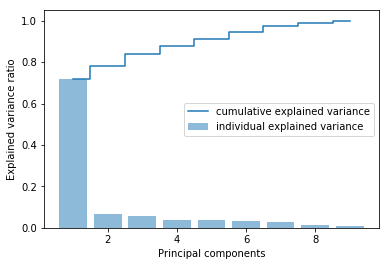

In [161]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_explained) 
print("Variance:",var_explained)
print("Cumulative Variance:",cum_var_exp)

plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [162]:
pcamodel = PCA(n_components=9)
pcamodel.fit(dfCancer_New)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [163]:
print(pcamodel.components_)

[[ 0.30166354  0.39720639  0.388655    0.33646416  0.20270769  0.45490256
   0.29494562  0.36836369  0.12749068]
 [ 0.01799639  0.25680393  0.21695027 -0.17547447  0.11815687 -0.76972202
   0.05295701  0.49531414 -0.03599419]
 [-0.89733474  0.02934392 -0.00876097  0.36346542  0.08807455  0.05425931
   0.09768962  0.20006492 -0.03840573]
 [ 0.08857288  0.26625499  0.19546733  0.59788057 -0.00352554 -0.3849304
  -0.01277784 -0.6133706  -0.03199779]
 [-0.30000904  0.4153282   0.44791482 -0.59312644  0.06317911  0.15044271
   0.04322566 -0.39517739  0.02030223]
 [-0.00823934  0.11548667  0.18233359  0.09773388  0.1245121   0.11764155
  -0.94459947  0.14821755 -0.01476835]
 [ 0.0378669  -0.01866523 -0.29842762 -0.06242993  0.93888707 -0.02477694
   0.03064778 -0.14898286 -0.00177571]
 [ 0.00307855  0.71902433 -0.66228134 -0.03428707 -0.18944994  0.05248896
  -0.05599888  0.03756111 -0.00304609]
 [ 0.0640606   0.03670127  0.04524158  0.0028822   0.01684958  0.09815625
   0.04779465  0.031341

# Q10 Find correlation between components and features

In [164]:
df_comp = pd.DataFrame(pcamodel.components_,columns=dfCancer_New.columns.values)

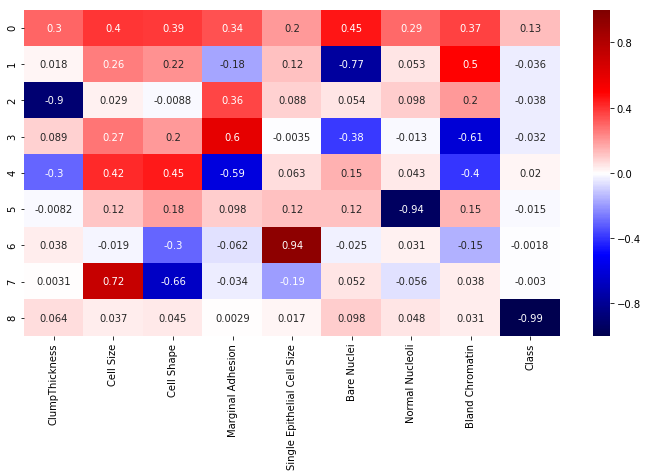

In [165]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='seismic', annot=True,vmax=1,vmin=-1)

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [124]:
dfJokes = pd.read_csv("jokes.csv")
dfJokes.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [125]:
ratings = dfJokes.iloc[:200 , 1:]
ratings

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q22 Change the column indices from 0 to 99

In [126]:
ratings.columns = np.arange(100)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [127]:
ratings = ratings.replace(99.00,0)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [131]:
scaler = preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(ratings)
ratings_diff = pd.DataFrame(scaled_features, index=ratings.index, columns=ratings.columns)
ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133


### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [142]:
ratings_diff.mean().sort_values(ascending=False).head(10)

98    1.840889e-16
81    1.243450e-16
97    1.198694e-16
20    1.065814e-16
94    1.054712e-16
92    8.770762e-17
47    7.771561e-17
73    7.743806e-17
99    7.549517e-17
49    7.494005e-17
dtype: float64